In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st 
import seaborn as sns
import folium

### Importing the Data

In [4]:
daily = pd.read_csv('dailydata.csv')
station = pd.read_csv('gwl-stations.csv')

In [5]:
daily.head()

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,14N01E35P001M,12/27/2022,48.74,1,46.88,1,42.442,2,40.582,2,6.298,2
1,14N01E35P004M,12/27/2022,47.62,1,46.88,1,20.786,2,20.046,2,26.834,2
2,16N03W14H004M,12/27/2022,68.21,1,65.70,1,19.735,2,17.225,2,48.475,2
3,14N01E35P001M,12/26/2022,48.74,1,46.88,1,42.552,2,40.692,2,6.188,2
4,14N01E35P004M,12/26/2022,47.62,1,46.88,1,20.829,2,20.089,2,26.791,2


Station = Unique Station identifier for most also well number

MSMT_Data = Date/Time in PST when collected

WLM_RPE = Reference Point Elevation used to collect measurement

WLM_RPE_QC = Quality Code for Measurement

WLM_GSE = Ground surface elevation at well site

WLM_GSE_QC = Quality Code for WLM_GSE measurement

RPE_WSE = Depth to the water surface in feet below the reference point

GSE_WSE = Depth below ground surface or distance from ground surface to
water surface in feet

GSE_WSE_QC = Quality Code for GSE_WSE MEasurement

WSE = Water Surface Elevation in feet above Mean Sea Level 

In [7]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   STATION     1048575 non-null  object 
 1   MSMT_DATE   1048575 non-null  object 
 2   WLM_RPE     1042002 non-null  float64
 3   WLM_RPE_QC  1048575 non-null  int64  
 4   WLM_GSE     1039724 non-null  float64
 5   WLM_GSE_QC  1048575 non-null  int64  
 6   RPE_WSE     963223 non-null   float64
 7   RPE_WSE_QC  1048575 non-null  int64  
 8   GSE_WSE     954445 non-null   float64
 9   GSE_WSE_QC  1048575 non-null  int64  
 10  WSE         956650 non-null   float64
 11  WSE_QC      1048575 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 96.0+ MB


In [8]:
daily['STATION'].nunique()

238

In [9]:
station.head()

,STATION,SITE_CODE,STNAME,WELL_NAME,LATITUDE,LONGITUDE,LLDATUM,POSACC,ELEV,ELEVDATUM,ELEVACC,COUNTY_NAME,BASIN_CODE,BASIN_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,WDL,COMMENT
0,01N04E36Q001M,378861N1214818W001,Middle River Barrier well 2W screen 61-81 ft bgs,MRL-2W,37.886056,-121.481833,NAD83,"Survey, 1m",6.9,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,81.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q001M is part of a well cluster. Othe...
1,01N04E36Q002M,378849N1214822W001,Middle River Barrier well 3W screen 14-34 ft bgs,MRL-3W,37.884861,-121.482167,NAD83,"Survey, 1m",-1.0,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,34.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q002M is part of a well cluster. Othe...
2,01N04E36Q003M,378860N1214819W001,Middle River Barrier well 2 screen 10-20 ft bgs,MLNO-2,37.886028,-121.481917,NAD83,"Survey, 1m",8.6,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q003M is part of a well cluster. Othe...
3,01N04E36Q004M,378850N1214820W001,Middle River Barrier well 1 screen 10-20 ft bgs,MLNO-1,37.885028,-121.482000,NAD83,"Survey, 1m",15.9,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q004M is part of a well cluster. Othe...
4,01S04E28F001M,378186N1215443W001,Grant Line Canal Barrier well 2W screen 10-25 ...,GLWL-2W,37.818556,-121.544333,NAD83,"Survey, 1m",16.1,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,25.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01S04E28F001M is part of a well cluster. Othe...


In [10]:
station.nunique()

STATION        551
SITE_CODE      540
STNAME         551
WELL_NAME      514
LATITUDE       304
LONGITUDE      304
LLDATUM          2
POSACC           3
ELEV           325
ELEVDATUM        1
ELEVACC          7
COUNTY_NAME     15
BASIN_CODE      26
BASIN_NAME      26
WELL_DEPTH     317
WELL_USE         7
WELL_TYPE        3
WCR_NO         282
WDL            551
COMMENT        196
dtype: int64

There are more stations in this dataset than there are stations in the main dataset, we will need to extract the matching ones. 

### Finding Common Stations from Secondary Data Set

In [13]:
Uniq_Stats = list(dict.fromkeys(daily['STATION']))

In [14]:
station_short = station[station['STATION'].isin(Uniq_Stats)]
station_short.nunique()

STATION        238
SITE_CODE      229
STNAME         238
WELL_NAME      238
LATITUDE       124
LONGITUDE      124
LLDATUM          2
POSACC           3
ELEV           125
ELEVDATUM        1
ELEVACC          6
COUNTY_NAME     10
BASIN_CODE      13
BASIN_NAME      13
WELL_DEPTH     163
WELL_USE         3
WELL_TYPE        2
WCR_NO          95
WDL            238
COMMENT        174
dtype: int64

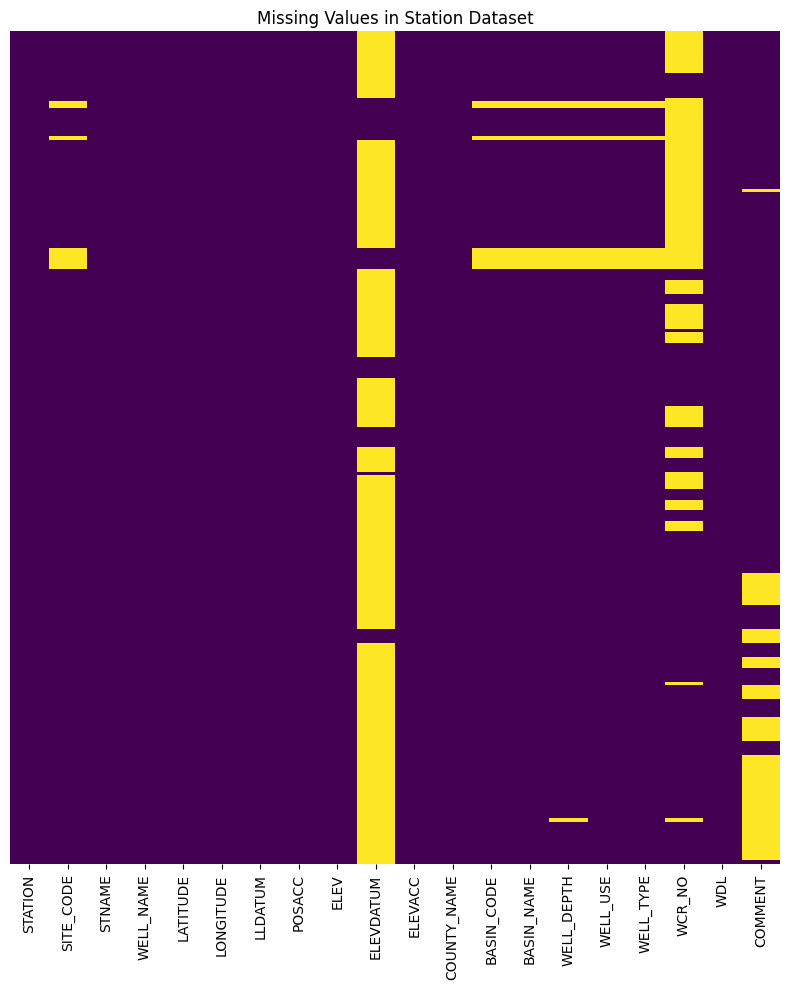

In [15]:
plt.figure(figsize=(8, 10))
sns.heatmap(station_short.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Station Dataset')
plt.tight_layout()
plt.show()

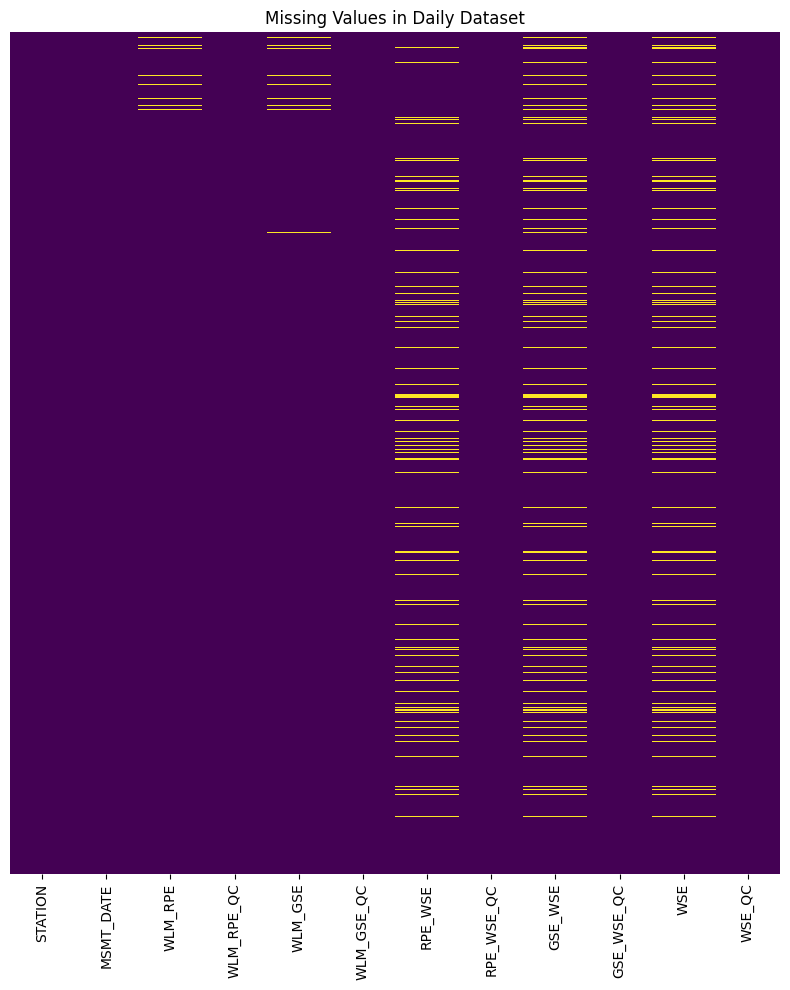

In [16]:
plt.figure(figsize=(8, 10))
sns.heatmap(daily.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Daily Dataset')
plt.tight_layout()
plt.show()

In [17]:
Merged = pd.merge(daily, station, on = 'STATION', how = 'inner')

In [18]:
Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   STATION      1048575 non-null  object 
 1   MSMT_DATE    1048575 non-null  object 
 2   WLM_RPE      1042002 non-null  float64
 3   WLM_RPE_QC   1048575 non-null  int64  
 4   WLM_GSE      1039724 non-null  float64
 5   WLM_GSE_QC   1048575 non-null  int64  
 6   RPE_WSE      963223 non-null   float64
 7   RPE_WSE_QC   1048575 non-null  int64  
 8   GSE_WSE      954445 non-null   float64
 9   GSE_WSE_QC   1048575 non-null  int64  
 10  WSE          956650 non-null   float64
 11  WSE_QC       1048575 non-null  int64  
 12  SITE_CODE    1041906 non-null  object 
 13  STNAME       1048575 non-null  object 
 14  WELL_NAME    1048575 non-null  object 
 15  LATITUDE     1048575 non-null  float64
 16  LONGITUDE    1048575 non-null  float64
 17  LLDATUM      1048575 non-null  object 
 18  PO

In [19]:
Key_data = Merged[['STATION','MSMT_DATE','WLM_RPE','WLM_GSE','RPE_WSE', 'GSE_WSE','WSE','LATITUDE','LONGITUDE']]

In [20]:
Key_data.head()

,STATION,MSMT_DATE,WLM_RPE,WLM_GSE,RPE_WSE,GSE_WSE,WSE,LATITUDE,LONGITUDE
0,14N01E35P001M,12/27/2022,48.74,46.88,42.442,40.582,6.298,39.012435,-121.829041
1,14N01E35P004M,12/27/2022,47.62,46.88,20.786,20.046,26.834,39.012435,-121.829041
2,16N03W14H004M,12/27/2022,68.21,65.70,19.735,17.225,48.475,39.241473,-122.153517
3,14N01E35P001M,12/26/2022,48.74,46.88,42.552,40.692,6.188,39.012435,-121.829041
4,14N01E35P004M,12/26/2022,47.62,46.88,20.829,20.089,26.791,39.012435,-121.829041


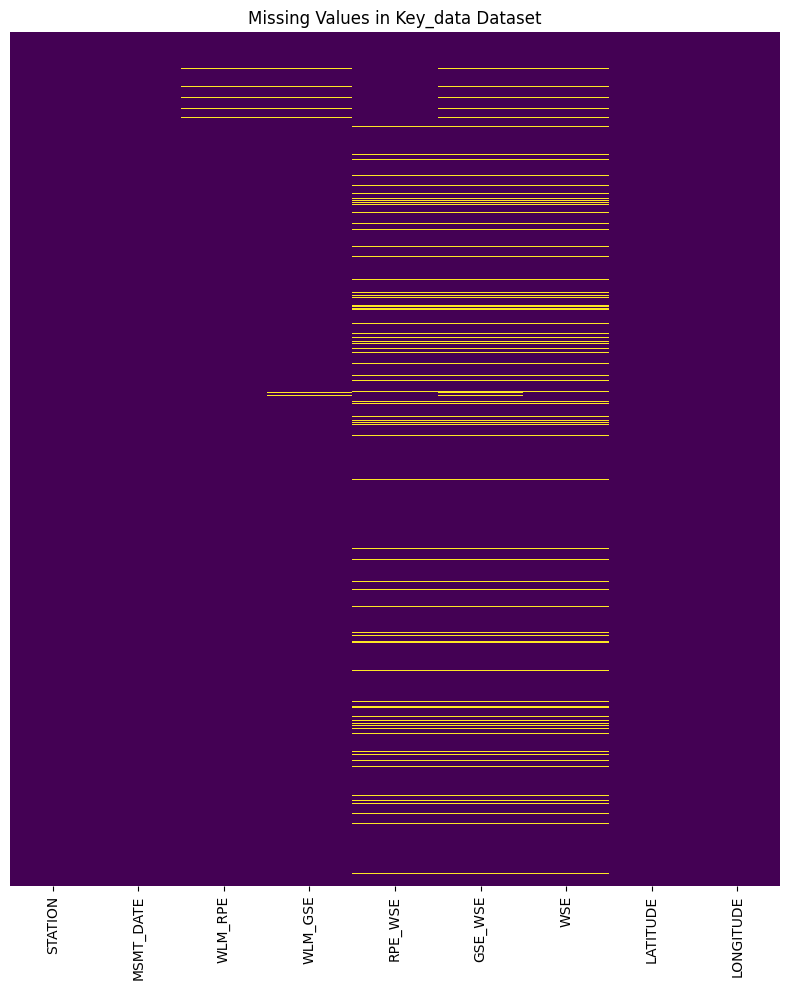

In [21]:
plt.figure(figsize=(8, 10))
sns.heatmap(Key_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Key_data Dataset')
plt.tight_layout()
plt.show()

### Sorting by Station

In [23]:
Sort_KD = Key_data.sort_values(by = ['STATION', 'MSMT_DATE'], ascending = True)

There are multiple stations per coordinate. 

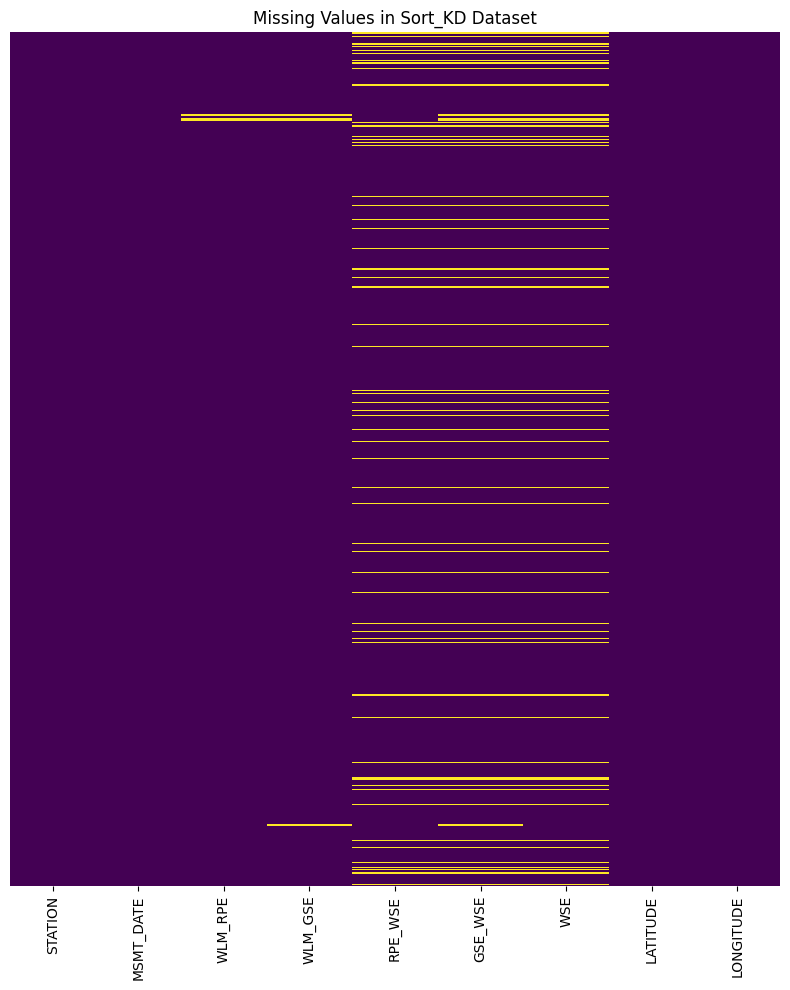

In [25]:
plt.figure(figsize=(8, 10))
sns.heatmap(Sort_KD.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Sort_KD Dataset')
plt.tight_layout()
plt.show()

Based on the heatmap shown above where all the data is sorted by station and then date, I believe that the data shown is MCAR. 
For groundwater data there should not be drastic shifts on a short time scale, thus I believe it would be best to use a simplified version of K-nearest neighbors to base each NaN value on the nearest date before and after. I am only applying this for RPE_WSE, GSE_WSE, and WSE as these are values that change with time. The other two columns with missing data are the reference points and surface elevation which are mostly static. 

In [27]:
Sort_KD.describe()

,WLM_RPE,WLM_GSE,RPE_WSE,GSE_WSE,WSE,LATITUDE,LONGITUDE
count,1.042002e+06,1.039724e+06,963223.000000,954445.000000,956650.000000,1.048575e+06,1.048575e+06
mean,4.991109e+01,4.812979e+01,21.899209,20.253326,27.523056,3.883887e+01,-1.217297e+02
std,4.908236e+01,4.899384e+01,19.311263,19.477138,49.853360,4.514712e-01,2.490049e-01
min,-5.700000e-01,-3.170000e+00,-12.492000,-15.292000,-170.798000,3.780969e+01,-1.233685e+02
25%,2.645000e+01,2.500000e+01,9.922000,8.360000,2.888000,3.864643e+01,-1.218279e+02
50%,3.669200e+01,3.554600e+01,16.798000,15.187000,19.063000,3.891160e+01,-1.216675e+02
75%,6.821000e+01,6.570000e+01,27.683000,26.195000,48.565000,3.917588e+01,-1.215436e+02
max,5.226500e+02,5.200000e+02,187.804000,186.534000,514.804000,3.949270e+01,-1.211169e+02


In [28]:
KD_nan = Sort_KD.isna().sum()
print(KD_nan)

STATION          0
MSMT_DATE        0
WLM_RPE       6573
WLM_GSE       8851
RPE_WSE      85352
GSE_WSE      94130
WSE          91925
LATITUDE         0
LONGITUDE        0
dtype: int64


### Interpolation/Imputation
The following interpolation was done with the help of Google AI studio version 2.5, 10/15/25

In [30]:
Sort_KD['MSMT_DATE'].head()

959070    1/1/2006
932095    1/1/2007
895960    1/1/2008
852734    1/1/2009
808798    1/1/2010
Name: MSMT_DATE, dtype: object

I realized the datetime data is still a string

In [32]:
Sort_KD['MSMT_DATE'] = pd.to_datetime(Sort_KD['MSMT_DATE'])

In [33]:
Sort_KD['MSMT_DATE'].head()

959070   2006-01-01
932095   2007-01-01
895960   2008-01-01
852734   2009-01-01
808798   2010-01-01
Name: MSMT_DATE, dtype: datetime64[ns]

In [34]:
Sort_KD = Sort_KD.sort_values(by = ['STATION', 'MSMT_DATE'], ascending = True)

In [35]:
Sort_KD.head()

,STATION,MSMT_DATE,WLM_RPE,WLM_GSE,RPE_WSE,GSE_WSE,WSE,LATITUDE,LONGITUDE
973704,01N04E36Q001M,2005-04-30,9.1,6.9,17.354,15.154,-8.254,37.886056,-121.481833
973650,01N04E36Q001M,2005-05-01,9.1,6.9,17.348,15.148,-8.248,37.886056,-121.481833
973596,01N04E36Q001M,2005-05-02,9.1,6.9,17.343,15.143,-8.243,37.886056,-121.481833
973542,01N04E36Q001M,2005-05-03,9.1,6.9,17.358,15.158,-8.258,37.886056,-121.481833
973488,01N04E36Q001M,2005-05-04,9.1,6.9,17.354,15.154,-8.254,37.886056,-121.481833


In [36]:
Sort_KD = Sort_KD.set_index('MSMT_DATE')

# Group by 'STATION', select the 'value' column, and apply interpolation.
# The lambda function operates on each group (each station's data) separately.
Sort_KD['RPE_WSE'] = Sort_KD.groupby('STATION')['RPE_WSE'].transform(
    lambda group: group.interpolate(method='time').ffill().bfill())
Sort_KD['GSE_WSE'] = Sort_KD.groupby('STATION')['GSE_WSE'].transform(
    lambda group: group.interpolate(method='time').ffill().bfill())
Sort_KD['WSE'] = Sort_KD.groupby('STATION')['WSE'].transform(
    lambda group: group.interpolate(method='time').ffill().bfill())

# Reset the index to bring 'MSMT_DATE' back as a regular column
Sort_KD = Sort_KD.reset_index()

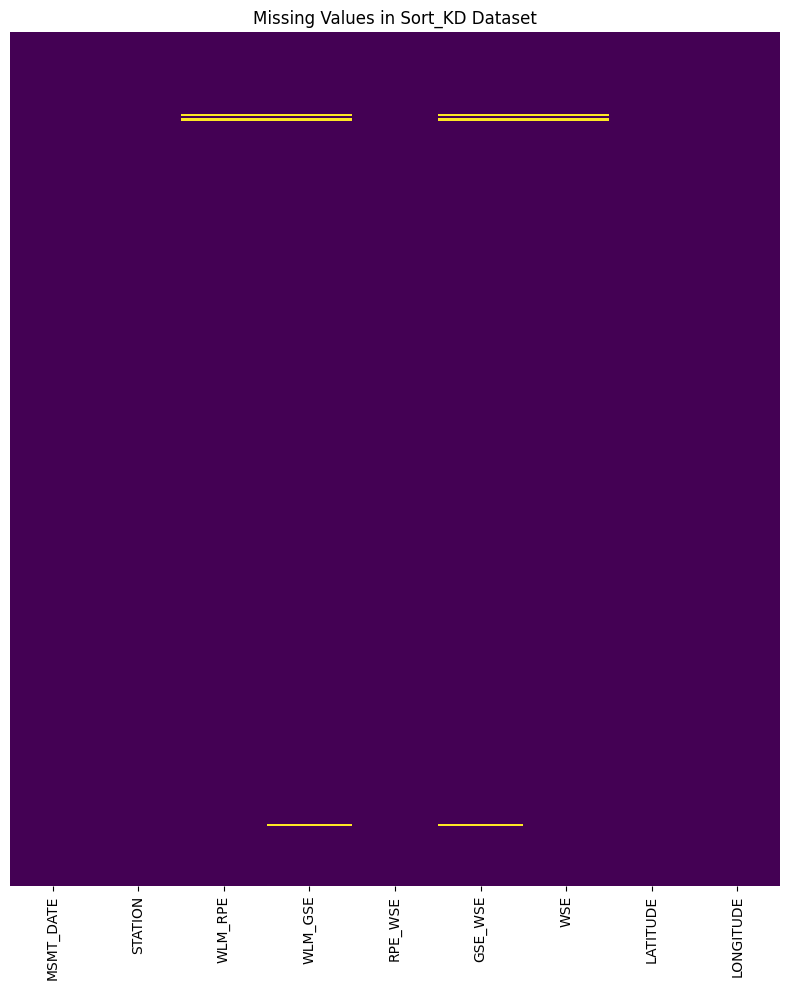

In [37]:
plt.figure(figsize=(8, 10))
sns.heatmap(Sort_KD.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Sort_KD Dataset')
plt.tight_layout()
plt.show()

In [38]:
KD_nan = Sort_KD.isna().sum()
print(KD_nan)

MSMT_DATE       0
STATION         0
WLM_RPE      6573
WLM_GSE      8851
RPE_WSE         0
GSE_WSE      8851
WSE          6573
LATITUDE        0
LONGITUDE       0
dtype: int64


As shown below, 9 stations are contributing all of the missingness. If there is still NaN based on the code above that means that there is no data whatsoever to interpolate so I will cut the stations listed below.

In [40]:
droplist = (Sort_KD['STATION'][Sort_KD['GSE_WSE'].isnull()].unique())
print(droplist)

['03N04E11L001M' '04N04E10Q001M' '04N04E10Q002M' '04N04E13A001M'
 '04N04E13A002M' '04N04E34N001M' '04N04E34N002M' '14N02W22A002M'
 '18N01E21L001M']


In [41]:
Data_Final = Sort_KD[~Sort_KD['STATION'].isin(droplist)]

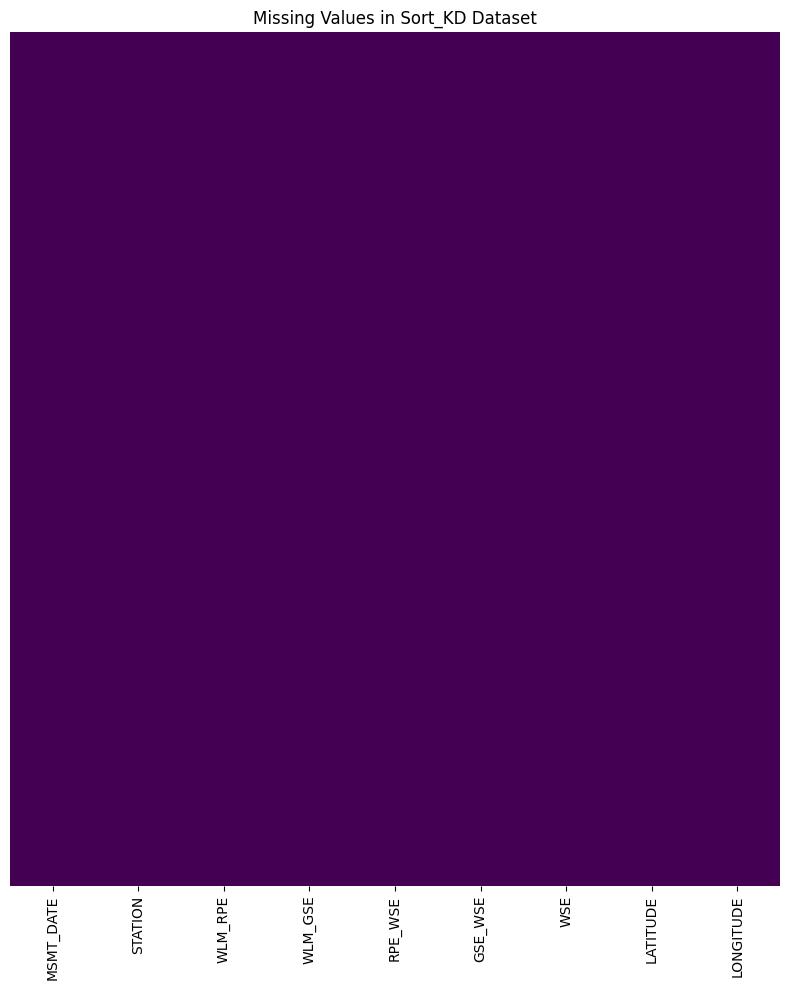

In [42]:
plt.figure(figsize=(8, 10))
sns.heatmap(Data_Final.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Sort_KD Dataset')
plt.tight_layout()
plt.show()

### Encoding Station Numbers
I will keep the station code, however it'll be far easier to search by station 1, station 2, station 3, etc

In [44]:
Data_Final['Station_Num'] = Data_Final.groupby('STATION').ngroup()

C:\Users\Groul\AppData\Local\Temp\ipykernel_35576\1706162623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Final['Station_Num'] = Data_Final.groupby('STATION').ngroup()


In [45]:
Data_Final.head()

,MSMT_DATE,STATION,WLM_RPE,WLM_GSE,RPE_WSE,GSE_WSE,WSE,LATITUDE,LONGITUDE,Station_Num
0,2005-04-30,01N04E36Q001M,9.1,6.9,17.354,15.154,-8.254,37.886056,-121.481833,0
1,2005-05-01,01N04E36Q001M,9.1,6.9,17.348,15.148,-8.248,37.886056,-121.481833,0
2,2005-05-02,01N04E36Q001M,9.1,6.9,17.343,15.143,-8.243,37.886056,-121.481833,0
3,2005-05-03,01N04E36Q001M,9.1,6.9,17.358,15.158,-8.258,37.886056,-121.481833,0
4,2005-05-04,01N04E36Q001M,9.1,6.9,17.354,15.154,-8.254,37.886056,-121.481833,0


In [46]:
print(Data_Final['Station_Num'].max())

228


### Practice Producing Plots by Station
I will come back and refine this later, I just wanted to have a method of seperating the stations for various graphs I will develop. I plan to have users either search by coordinate and have the nearest well pop up or click on a map. 

In [48]:
def Line_stat(station = 0, parameter = 'GSE_WSE'):
    data = Data_Final[Data_Final['Station_Num'] == station]
    fig = plt.figure(figsize = (18,10))
    plot = plt.plot(data['MSMT_DATE'],data[parameter])
    plt.tight_layout()
    return fig

    

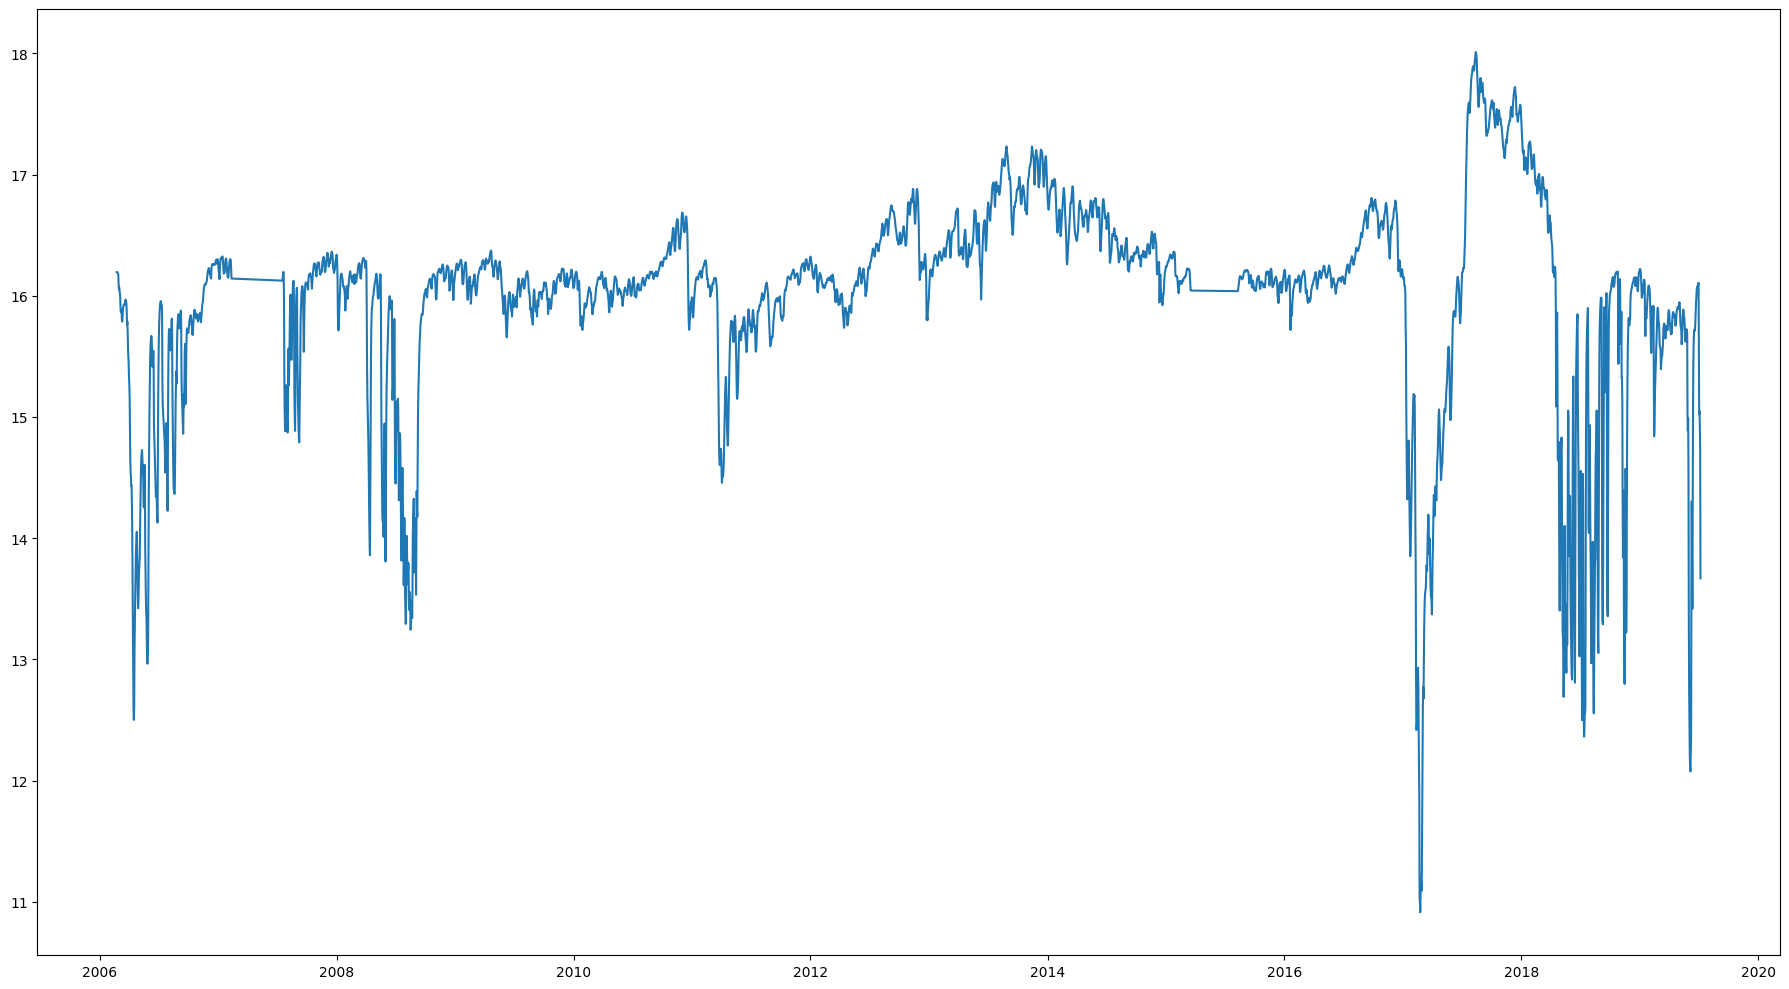

In [117]:
Example_1 = Line_stat(10)

### Beginning to play with the map

In [51]:
#Google AI Studio version 2.5 10/15/25
Coords = Data_Final.groupby('Station_Num')[['LATITUDE', 'LONGITUDE']].first()

print(Coords)

              LATITUDE   LONGITUDE
Station_Num                       
0            37.886056 -121.481833
1            37.884861 -121.482167
2            37.886028 -121.481917
3            37.885028 -121.482000
4            37.818556 -121.544333
...                ...         ...
224          39.420773 -122.134145
225          39.463547 -121.827619
226          39.463439 -121.827750
227          39.463439 -121.827750
228          39.492702 -121.964808

[229 rows x 2 columns]


In [94]:
california = folium.Map(max_bounds = True, location=[36.7783, -119.4179], zoom_start=6, min_lat=36,max_lat=40,min_lon=-124,max_lon=-119)
for i in Coords.index:
     folium.Marker(
        location= [Coords.iloc[i,0],Coords.iloc[i,1]],
        tooltip= 'Click Me',  # Optional: tooltip on hover
        popup = f'Station {i}'
    ).add_to(california)
display(california)

In [105]:
!pip install streamlit_folium

   ---------------------------------------- 0.0/524.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/524.6 kB ? eta -:--:--
   ---------------------------------------- 524.6/524.6 kB 4.2 MB/s eta 0:00:00


In [114]:
%%writefile project.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st 
import seaborn as sns
import folium
from streamlit_folium import st_folium

### Beginning
daily = pd.read_csv('dailydata.csv')
station = pd.read_csv('gwl-stations.csv')
Uniq_Stats = list(dict.fromkeys(daily['STATION']))
Merged = pd.merge(daily, station, on = 'STATION', how = 'inner')
Key_data = Merged[['STATION','MSMT_DATE','WLM_RPE','WLM_GSE','RPE_WSE', 'GSE_WSE','WSE','LATITUDE','LONGITUDE']]
Sort_KD = Key_data.sort_values(by = ['STATION', 'MSMT_DATE'], ascending = True)
droplist = (Sort_KD['STATION'][Sort_KD['GSE_WSE'].isnull()].unique())
Data_Final = Sort_KD[~Sort_KD['STATION'].isin(droplist)]
Data_Final['Station_Num'] = Data_Final.groupby('STATION').ngroup()
Coords = Data_Final.groupby('Station_Num')[['LATITUDE', 'LONGITUDE']].first()
california = folium.Map(max_bounds = True, location=[36.7783, -119.4179], zoom_start=6, min_lat=36,max_lat=40,min_lon=-124,max_lon=-119)

### Site
st.title("Analyzing Central California Groundwater")
station_short = station[station['STATION'].isin(Uniq_Stats)]
tab1, tab2 = st.tabs(['Introduction', "Initial Analysis and Data Prep"])

#Functions
def Line_stat(station = 0, parameter = 'GSE_WSE'):
    data = Data_Final[Data_Final['Station_Num'] == station]
    fig = plt.figure(figsize = (18,10))
    plot = plt.plot(data['MSMT_DATE'],data[parameter])
    plt.tight_layout()
    return fig

with tab1:
    st.header("Introduction")
    st.write("Overview")
    st.pyplot(Line_stat(10))


with tab2:
    st.header("Initial Analysis and Data Prep")
    #plot of spectral signatures
    st.write("Map")
    for i in Coords.index:
     folium.Marker(
        location= [Coords.iloc[i,0],Coords.iloc[i,1]],
        tooltip= 'Click Me',  # Optional: tooltip on hover
        popup = f'Station {i}'
    ).add_to(california)
    st_data = st_folium(california, width=725)
    


Overwriting project.py
